<a href="https://colab.research.google.com/github/GerardoMunoz/ML_2025/blob/main/ML_010_data_types_polars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Data types

## 1. Basic data types
* Numeric
* Categorical
* Binnary
* Vectors of $\mathbb{R}^n$
* Structure
* Others, for example:
  * Text
  * Audio
  * Images

## 2. Transformations

### 2.1 Binning or Discretization
 Transforms Numeric to Categorical data type

 #### 2.1.1 Fixed Binning
  Manually define bins and labels.  

For example,  categorize Age into:

*   0-18 → Child
*   19-35 → Young
*   36-50 → Adult
*   51+ → Senior


#### 2.1.2 Equal Width Binning
Automatically splits into bins of equal width.

#### 2.1.3 Equal Frequency Binning
Ensures each bin contains approximately the same number of values.

### 2.2 One-Hot
Transforms categorical values into separate binary columns.

### 2.2.1 Dummy One-Hot
* Child → [1,0,0,0]
* Young  → [0,1,0,0]
* Adult → [0,0,1,0]
* Senior → [0,0,0,1]

### 2.2.2 Cumulative One-Hot
It is recomended when the categorical information has order

* Child → [1,0,0,0]
* Young  → [1,1,0,0]
* Adult → [1,1,1,0]
* Senior → [1,1,1,1]

This method is commonly used in logistic regression and tree-based models, where maintaining cumulative relationships improves learning efficiency


## 3. Exercises
For the next data define the type and the numerical convert to categorical and One-Hot. And categorical convert to One-Hot
1. Educational Level
2. Is student
3. City of birth
4. Temperature
5. Area code
6. Favorite Sport

## 4. Data sets

### 4.1. Google datasetsearch
https://datasetsearch.research.google.com/

## 4.2. Kaggle examples

https://www.kaggle.com/datasets/krishnanshverma/academic-performance-of-university-student-dataset

https://www.kaggle.com/datasets/danielgrijalvas/movies

https://www.kaggle.com/datasets/asinow/schizohealth-dataset

https://www.kaggle.com/datasets/alikalwar/uae-used-car-prices-and-features-10k-listings

## 5. Polars

https://www.kaggle.com/code/gerardomunoz/imdb-polars

https://docs.pola.rs/user-guide/getting-started/



In [ ]:
import polars as pl
import random

# Define a list of South American countries
countries = ["Bolivia", "Colombia", "Ecuador", "Peru",  "Venezuela"]

# Create an empty list to store the data for the DataFrame
data = []

# Generate 15 rows of data
for i in range(10):
  data.append({
      "Name": f"Person {i + 1}",  # Create unique names
      "Years Old": random.randint(10, 65),  # Random ages between 18 and 65
      "Country of Birth": random.choice(countries)  # Random country of birth
  })

# Create the Polars DataFrame
df = pl.DataFrame(data)

df


Name,Years Old,Country of Birth
str,i64,str
"""Person 1""",57,"""Bolivia"""
"""Person 2""",55,"""Peru"""
"""Person 3""",35,"""Venezuela"""
"""Person 4""",59,"""Bolivia"""
"""Person 5""",32,"""Peru"""
"""Person 6""",17,"""Ecuador"""
"""Person 7""",53,"""Ecuador"""
"""Person 8""",36,"""Peru"""
"""Person 9""",30,"""Colombia"""


In [ ]:
df["Country of Birth"].to_dummies()

Country of Birth_Bolivia,Country of Birth_Colombia,Country of Birth_Ecuador,Country of Birth_Peru,Country of Birth_Venezuela
u8,u8,u8,u8,u8
1,0,0,0,0
0,0,0,1,0
0,0,0,0,1
1,0,0,0,0
0,0,0,1,0
0,0,1,0,0
0,0,1,0,0
0,0,0,1,0
0,1,0,0,0


In [ ]:
# prompt: Convert the years old to 4 categorical data

import polars as pl
import random

bins = [0, 18, 35, 50, 999]
#labels = ["Child", "Young", "Adult", "Senior"]

# Use cut function to categorize 'Years Old' column
df_2 = df.with_columns(pl.col("Years Old").cut(bins).alias("Age Category"))

df_2


Name,Years Old,Country of Birth,Age Category
str,i64,str,cat
"""Person 1""",57,"""Bolivia""","""(50, 999]"""
"""Person 2""",55,"""Peru""","""(50, 999]"""
"""Person 3""",35,"""Venezuela""","""(18, 35]"""
"""Person 4""",59,"""Bolivia""","""(50, 999]"""
"""Person 5""",32,"""Peru""","""(18, 35]"""
"""Person 6""",17,"""Ecuador""","""(0, 18]"""
"""Person 7""",53,"""Ecuador""","""(50, 999]"""
"""Person 8""",36,"""Peru""","""(35, 50]"""
"""Person 9""",30,"""Colombia""","""(18, 35]"""


In [ ]:

def cat2cumulative(df, column_name):
  categories = df[column_name].unique().to_list()
  for cat in categories:
    df = df.with_columns(
        pl.when(pl.col(column_name) >= cat)
        .then(1)
        .otherwise(0)
        .alias(f"{column_name}_{cat}")
    )
  return df

df_3 = cat2cumulative(df_2, "Age Category")
df_3


Name,Years Old,Country of Birth,Age Category,"Age Category_(0, 18]","Age Category_(18, 35]","Age Category_(35, 50]","Age Category_(50, 999]"
str,i64,str,cat,i32,i32,i32,i32
"""Person 1""",57,"""Bolivia""","""(50, 999]""",1,1,1,1
"""Person 2""",55,"""Peru""","""(50, 999]""",1,1,1,1
"""Person 3""",35,"""Venezuela""","""(18, 35]""",1,1,0,0
"""Person 4""",59,"""Bolivia""","""(50, 999]""",1,1,1,1
"""Person 5""",32,"""Peru""","""(18, 35]""",1,1,0,0
"""Person 6""",17,"""Ecuador""","""(0, 18]""",1,0,0,0
"""Person 7""",53,"""Ecuador""","""(50, 999]""",1,1,1,1
"""Person 8""",36,"""Peru""","""(35, 50]""",1,1,1,0
"""Person 9""",30,"""Colombia""","""(18, 35]""",1,1,0,0


In [ ]:
def num2cumulative(df, column_name,bins):
  categories = [f'[{bins[i]}-{bins[i+1]})' for i in range(len(bins)-1)]
  for i,cat in enumerate(categories):
    df = df.with_columns(
        pl.when(pl.col(column_name) >= bins[i])
        .then(1)
        .otherwise(0)
        .alias(f"{column_name}_{cat}")
    )
  return df

bins = [0, 17, 35, 50, 999]

df_4 = num2cumulative(df, "Years Old", bins)
df_4


Name,Years Old,Country of Birth,Years Old_[0-17),Years Old_[17-35),Years Old_[35-50),Years Old_[50-999)
str,i64,str,i32,i32,i32,i32
"""Person 1""",57,"""Bolivia""",1,1,1,1
"""Person 2""",55,"""Peru""",1,1,1,1
"""Person 3""",35,"""Venezuela""",1,1,1,0
"""Person 4""",59,"""Bolivia""",1,1,1,1
"""Person 5""",32,"""Peru""",1,1,0,0
"""Person 6""",17,"""Ecuador""",1,1,0,0
"""Person 7""",53,"""Ecuador""",1,1,1,1
"""Person 8""",36,"""Peru""",1,1,1,0
"""Person 9""",30,"""Colombia""",1,1,0,0


## 6. hvPlot

https://hvplot.holoviz.org/reference/index.html

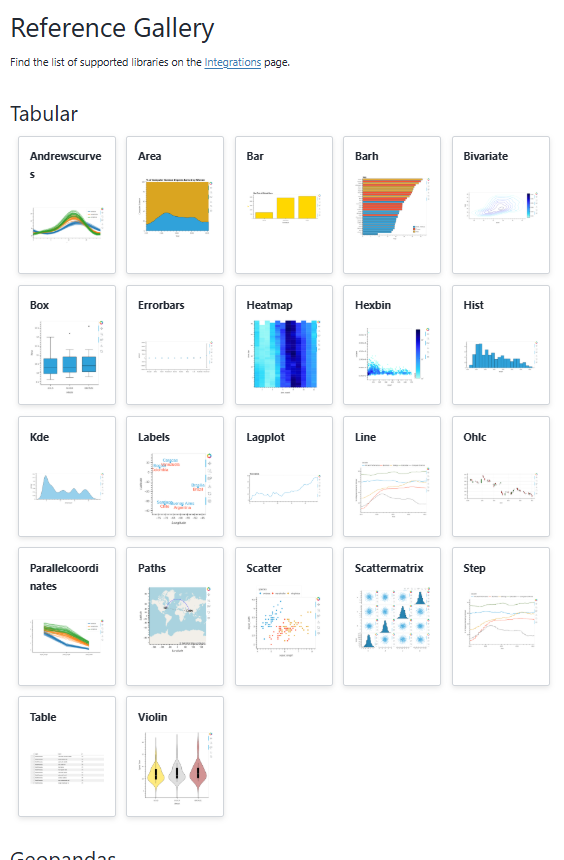

4.

In [ ]:
df = pl.DataFrame({
    #"date": pl.date_range("2024-01-01", "2024-01-10", interval="1d"),
    "index": [1,2,3,4,5,6,7,8,9,10],
    "temperature": [30, 32, 34, 31, 29, 28, 33, 35, 37, 36],
    "humidity": [45, 50, 55, 53, 52, 48, 46, 47, 49, 51]
})
df

index,temperature,humidity
i64,i64,i64
1,30,45
2,32,50
3,34,55
4,31,53
5,29,52
6,28,48
7,33,46
8,35,47
9,37,49


In [ ]:
#!pip install  hvplot holoviews

* Basic Line Plot:
You can create a simple line plot using hvplot.line():

In [ ]:
import hvplot.polars
df.hvplot.line(x="index", y="temperature", title="Temperature Over Time")


:Curve   [index]   (temperature)

* Scatter Plot:
For a scatter plot:


In [ ]:
df.hvplot.scatter(x="temperature", y="humidity", title="Temperature vs Humidity")


:Scatter   [temperature]   (humidity)

*  Bar Plot:
To visualize data with a bar plot:

In [ ]:
df.hvplot.bar(x="index", y="temperature", title="Daily Temperature")


:Bars   [index]   (temperature)